In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
from sklearn import metrics
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import re
import numpy as np

In [3]:
data_train = pd.read_csv('train.tsv', sep='\t')
data_test = pd.read_csv('test.tsv', sep='\t')
data_train

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [4]:
data_train.isnull().sum()

PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
dtype: int64

#Lowercase

In [5]:

data_train['lowercase'] = data_train['Phrase'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data_train.head()


,PhraseId,SentenceId,Phrase,Sentiment,lowercase
0,1,1,A series of escapades demonstrating the adage ...,1,a series of escapades demonstrating the adage ...
1,2,1,A series of escapades demonstrating the adage ...,2,a series of escapades demonstrating the adage ...
2,3,1,A series,2,a series
3,4,1,A,2,a
4,5,1,series,2,series


#**Removing stopwords**

In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
data_train['Phrase'] = data_train['Phrase'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
data_train.head()

,PhraseId,SentenceId,Phrase,Sentiment,lowercase
0,1,1,A series escapades demonstrating adage good go...,1,a series of escapades demonstrating the adage ...
1,2,1,A series escapades demonstrating adage good goose,2,a series of escapades demonstrating the adage ...
2,3,1,A series,2,a series
3,4,1,A,2,a
4,5,1,series,2,series


#Removing Punctuation

In [8]:
data_train['Punctuation'] = data_train['lowercase'].str.replace('[^\w\s]','')
data_train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,PhraseId,SentenceId,Phrase,Sentiment,lowercase,Punctuation
0,1,1,A series escapades demonstrating adage good go...,1,a series of escapades demonstrating the adage ...,a series of escapades demonstrating the adage ...
1,2,1,A series escapades demonstrating adage good goose,2,a series of escapades demonstrating the adage ...,a series of escapades demonstrating the adage ...
2,3,1,A series,2,a series,a series
3,4,1,A,2,a,a
4,5,1,series,2,series,series


#Removing userid

In [9]:

import re
def remove_usernames(phrase):#function to remove username from the text
    phrase= re.sub('@[^\s]+','',phrase)
    phrase = re.sub('http[^\s]+','',phrase)
    return phrase

data_train['UserId']=data_train['Phrase'].apply(remove_usernames)
data_train.head()

,PhraseId,SentenceId,Phrase,Sentiment,lowercase,Punctuation,UserId
0,1,1,A series escapades demonstrating adage good go...,1,a series of escapades demonstrating the adage ...,a series of escapades demonstrating the adage ...,A series escapades demonstrating adage good go...
1,2,1,A series escapades demonstrating adage good goose,2,a series of escapades demonstrating the adage ...,a series of escapades demonstrating the adage ...,A series escapades demonstrating adage good goose
2,3,1,A series,2,a series,a series,A series
3,4,1,A,2,a,a,A
4,5,1,series,2,series,series,series


#Removing links

In [10]:

import re
data_train['cleanLinks'] = data_train['Phrase'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

#Word count in phrase

In [11]:

def words(UserId):
  res = len(UserId.split())
  return res
data_train['Word_count']=data_train['cleanLinks'].apply(words)
data_train.head()

,PhraseId,SentenceId,Phrase,Sentiment,lowercase,Punctuation,UserId,cleanLinks,Word_count
0,1,1,A series escapades demonstrating adage good go...,1,a series of escapades demonstrating the adage ...,a series of escapades demonstrating the adage ...,A series escapades demonstrating adage good go...,A series escapades demonstrating adage good go...,18
1,2,1,A series escapades demonstrating adage good goose,2,a series of escapades demonstrating the adage ...,a series of escapades demonstrating the adage ...,A series escapades demonstrating adage good goose,A series escapades demonstrating adage good goose,7
2,3,1,A series,2,a series,a series,A series,A series,2
3,4,1,A,2,a,a,A,A,1
4,5,1,series,2,series,series,series,series,1


#Removing empty rows

In [12]:
 
data_train['Phrase'].replace('', np.nan, inplace=True)
data_train.dropna(subset = ["Phrase"], inplace=True)
data_train.head(20)

,PhraseId,SentenceId,Phrase,Sentiment,lowercase,Punctuation,UserId,cleanLinks,Word_count
0,1,1,A series escapades demonstrating adage good go...,1,a series of escapades demonstrating the adage ...,a series of escapades demonstrating the adage ...,A series escapades demonstrating adage good go...,A series escapades demonstrating adage good go...,18
1,2,1,A series escapades demonstrating adage good goose,2,a series of escapades demonstrating the adage ...,a series of escapades demonstrating the adage ...,A series escapades demonstrating adage good goose,A series escapades demonstrating adage good goose,7
2,3,1,A series,2,a series,a series,A series,A series,2
3,4,1,A,2,a,a,A,A,1
4,5,1,series,2,series,series,series,series,1
5,6,1,escapades demonstrating adage good goose,2,of escapades demonstrating the adage that what...,of escapades demonstrating the adage that what...,escapades demonstrating adage good goose,escapades demonstrating adage good goose,5
7,8,1,escapades demonstrating adage good goose,2,escapades demonstrating the adage that what is...,escapades demonstrating the adage that what is...,escapades demonstrating adage good goose,escapades demonstrating adage good goose,5
8,9,1,escapades,2,escapades,escapades,escapades,escapades,1
9,10,1,demonstrating adage good goose,2,demonstrating the adage that what is good for ...,demonstrating the adage that what is good for ...,demonstrating adage good goose,demonstrating adage good goose,4
10,11,1,demonstrating adage,2,demonstrating the adage,demonstrating the adage,demonstrating adage,demonstrating adage,2


In [13]:
data_train = data_train[data_train['Phrase'].str.split().str.len().lt(4)]

In [14]:
from sklearn.model_selection import train_test_split
x=data_train.Phrase
y=data_train.Sentiment
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,  random_state=1)
x_train_df = vect.fit_transform(X_train)
x_test_df = vect.transform(X_test)
print('Number of features:', len(vect.get_feature_names()))


Number of features: 14868


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [15]:
data_train = data_train[data_train['Phrase'].str.split().str.len().lt(45)]

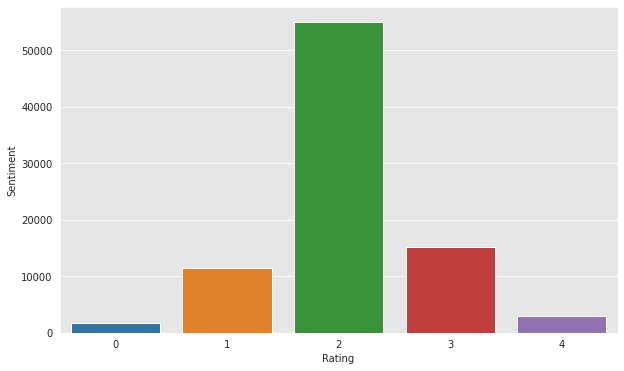

In [16]:
#Visualization of data set
a = data_train.Sentiment.value_counts()
a = pd.DataFrame(a)
a['Rating'] = a.index
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(y='Sentiment', x='Rating', data=a)

In [17]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train_df, y_train)
y_pred_class = nb.predict(x_test_df)
print('NB:', metrics.accuracy_score(y_test, y_pred_class))

NB: 0.6946312615955473


In [18]:
from sklearn.linear_model import SGDClassifier
SVM = SGDClassifier()
SVM.fit(x_train_df, y_train)
y_pred_class = SVM.predict(x_test_df)
print('SVM:', metrics.accuracy_score(y_test, y_pred_class))

SVM: 0.6910946196660482


In [19]:

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=17)
classifier.fit(x_train_df, y_train)
y_pred_class = classifier.predict(x_test_df)
print('LR:',metrics.accuracy_score(y_test, y_pred_class))


LR: 0.7105171614100185


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [20]:
data_train

,PhraseId,SentenceId,Phrase,Sentiment,lowercase,Punctuation,UserId,cleanLinks,Word_count
2,3,1,A series,2,a series,a series,A series,A series,2
3,4,1,A,2,a,a,A,A,1
4,5,1,series,2,series,series,series,series,1
8,9,1,escapades,2,escapades,escapades,escapades,escapades,1
10,11,1,demonstrating adage,2,demonstrating the adage,demonstrating the adage,demonstrating adage,demonstrating adage,2
...,...,...,...,...,...,...,...,...,...
156055,156056,8544,Hearst 's,2,hearst 's,hearst s,Hearst 's,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1,forced avuncular chortles,forced avuncular chortles,forced avuncular chortles,forced avuncular chortles,3
156057,156058,8544,avuncular chortles,3,avuncular chortles,avuncular chortles,avuncular chortles,avuncular chortles,2
156058,156059,8544,avuncular,2,avuncular,avuncular,avuncular,avuncular,1


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train_df, y_train)
y_pred_class = rfc.predict(x_test_df)
print('RF:',metrics.accuracy_score(y_test, y_pred_class))